In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Model

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [4]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(56, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.1664 - accuracy: 0.9497
Epoch 2/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0569 - accuracy: 0.9826
Epoch 3/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0442 - accuracy: 0.9867
Epoch 4/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0341 - accuracy: 0.9898
Epoch 5/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0292 - accuracy: 0.9907
Epoch 6/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0271 - accuracy: 0.9917
Epoch 7/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0219 - accuracy: 0.9929
Epoch 8/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0197 - accuracy: 0.9938
Epoch 9/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0195 - accuracy: 0.9939
Epoch 10/10
60000/60000 [============

In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 68us/step


[0.04809242393644221, 0.9905999898910522]

9


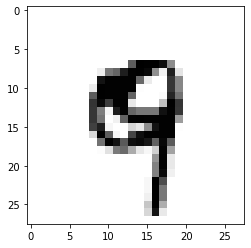

In [7]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [8]:
'''
Activation Maps
'''

'\nActivation Maps\n'

In [9]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[image_index].reshape(1, 28, 28, 1)) 

In [10]:
len(activations)

10

(1, 26, 26, 28)
(1, 13, 13, 28)
(1, 11, 11, 56)
(1, 5, 5, 56)
(1, 1400)


IndexError: too many indices for array

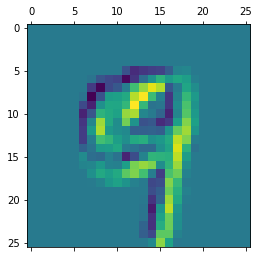

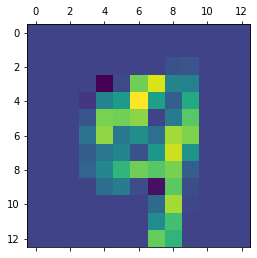

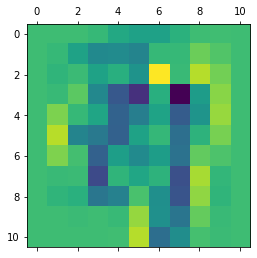

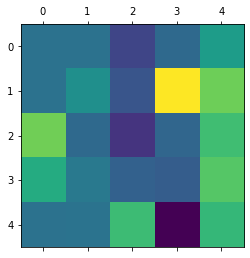

In [11]:
for var in range(len(activations)):
    layer_activation = activations[var] #Activation map for any layer can be seen from here
    print(layer_activation.shape)
    plt.matshow(layer_activation[0, :, :, 1], cmap='viridis')